<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(0_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n20.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.285921,36.710493,64.433661,2.748737,157.178812,154.285536,2.893277
1,0.0,1.0,73.741913,35.359141,49.293463,-4.293795,164.100722,168.707459,-4.606737
2,0.0,2.0,59.714715,57.938860,36.289520,1.008496,164.951590,163.683720,1.267870
3,0.0,3.0,59.358653,46.756153,66.304030,2.427118,184.845953,182.557113,2.288840
4,0.0,4.0,86.483853,67.624763,28.799595,2.999881,195.908092,193.046623,2.861469
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,28.874684,87.962500,70.735820,3.799823,201.372827,197.687515,3.685312
59996,999.0,56.0,34.602598,49.526830,39.214736,1.736873,135.081036,133.490929,1.590107
59997,999.0,57.0,26.545610,83.491383,47.618633,-0.832144,166.823482,167.800354,-0.976871
59998,999.0,58.0,66.979362,91.074625,68.505554,3.463036,240.022577,236.713389,3.309188


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.285921,36.710493,64.433661,2.748737,157.178812,154.285536,2.893277
1,0.0,1.0,73.741913,35.359141,49.293463,-4.293795,164.100722,168.707459,-4.606737
2,0.0,2.0,59.714715,57.938860,36.289520,1.008496,164.951590,163.683720,1.267870
3,0.0,3.0,59.358653,46.756153,66.304030,2.427118,184.845953,182.557113,2.288840
4,0.0,4.0,86.483853,67.624763,28.799595,2.999881,195.908092,193.046623,2.861469
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,28.874684,87.962500,70.735820,3.799823,201.372827,197.687515,3.685312
59996,999.0,56.0,34.602598,49.526830,39.214736,1.736873,135.081036,133.490929,1.590107
59997,999.0,57.0,26.545610,83.491383,47.618633,-0.832144,166.823482,167.800354,-0.976871
59998,999.0,58.0,66.979362,91.074625,68.505554,3.463036,240.022577,236.713389,3.309188


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    43.285921  36.710493  64.433661  ...  157.178812  154.285536  2.893277
      1.0    73.741913  35.359141  49.293463  ...  164.100722  168.707459 -4.606737
      2.0    59.714715  57.938860  36.289520  ...  164.951590  163.683720  1.267870
      3.0    59.358653  46.756153  66.304030  ...  184.845953  182.557113  2.288840
      4.0    86.483853  67.624763  28.799595  ...  195.908092  193.046623  2.861469
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   28.874684  87.962500  70.735820  ...  201.372827  197.687515  3.685312
      56.0   34.602598  49.526830  39.214736  ...  135.081036  133.490929  1.590107
      57.0   26.545610  83.491383  47.618633  ...  166.823482  167.800354 -0.976871
      58.0   66.979362  91.074625  68.505554  ...  240.022577  236.713389  3.309188
      59.0   72.848902  33.900974  39.186350  ...  156.363478  156.109319  0.254159

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    43.285921  36.710493  64.433661  ...  157.178812  154.285536  2.893277
      1.0    73.741913  35.359141  49.293463  ...  164.100722  168.707459 -4.606737
      2.0    59.714715  57.938860  36.289520  ...  164.951590  163.683720  1.267870
      3.0    59.358653  46.756153  66.304030  ...  184.845953  182.557113  2.288840
      4.0    86.483853  67.624763  28.799595  ...  195.908092  193.046623  2.861469
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   28.874684  87.962500  70.735820  ...  201.372827  197.687515  3.685312
      56.0   34.602598  49.526830  39.214736  ...  135.081036  133.490929  1.590107
      57.0   26.545610  83.491383  47.618633  ...  166.823482  167.800354 -0.976871
      58.0   66.979362  91.074625  68.505554  ...  240.022577  236.713389  3.309188
      59.0   72.848902  33.900974  39.186350  ...  156.363478  156.109319  0.254159

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.285921,36.710493,64.433661,2.748737,157.178812,154.285536,2.893277
1,0.0,1.0,73.741913,35.359141,49.293463,-4.293795,164.100722,168.707459,-4.606737
2,0.0,2.0,59.714715,57.938860,36.289520,1.008496,164.951590,163.683720,1.267870
3,0.0,3.0,59.358653,46.756153,66.304030,2.427118,184.845953,182.557113,2.288840
4,0.0,4.0,86.483853,67.624763,28.799595,2.999881,195.908092,193.046623,2.861469
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,28.874684,87.962500,70.735820,3.799823,201.372827,197.687515,3.685312
59996,999.0,56.0,34.602598,49.526830,39.214736,1.736873,135.081036,133.490929,1.590107
59997,999.0,57.0,26.545610,83.491383,47.618633,-0.832144,166.823482,167.800354,-0.976871
59998,999.0,58.0,66.979362,91.074625,68.505554,3.463036,240.022577,236.713389,3.309188


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    43.285921  36.710493  64.433661  ...  157.178812  154.285536  2.893277
      1.0    73.741913  35.359141  49.293463  ...  164.100722  168.707459 -4.606737
      2.0    59.714715  57.938860  36.289520  ...  164.951590  163.683720  1.267870
      3.0    59.358653  46.756153  66.304030  ...  184.845953  182.557113  2.288840
      4.0    86.483853  67.624763  28.799595  ...  195.908092  193.046623  2.861469
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   28.874684  87.962500  70.735820  ...  201.372827  197.687515  3.685312
      56.0   34.602598  49.526830  39.214736  ...  135.081036  133.490929  1.590107
      57.0   26.545610  83.491383  47.618633  ...  166.823482  167.800354 -0.976871
      58.0   66.979362  91.074625  68.505554  ...  240.022577  236.713389  3.309188
      59.0   72.848902  33.900974  39.186350  ...  156.363478  156.109319  0.254159

[60000 rows x 7 columns]

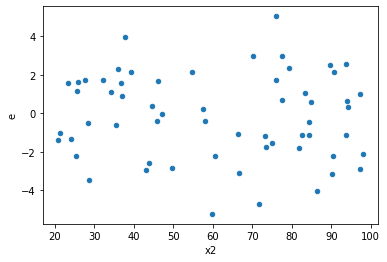

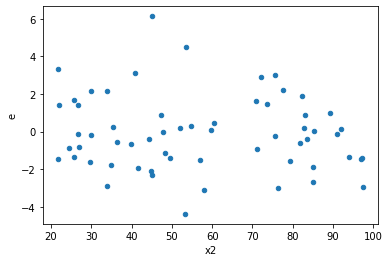

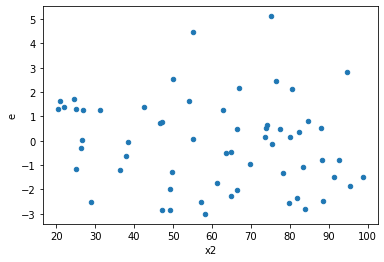

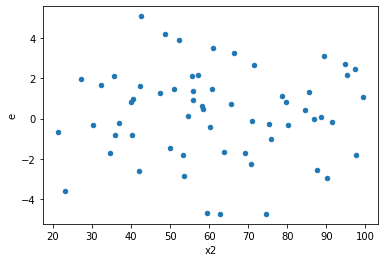

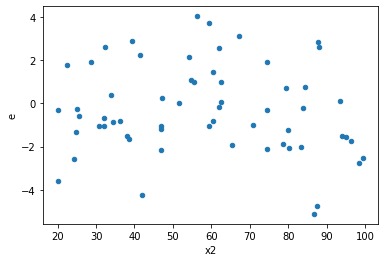

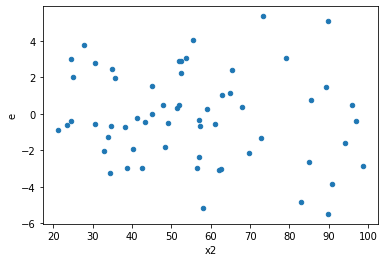

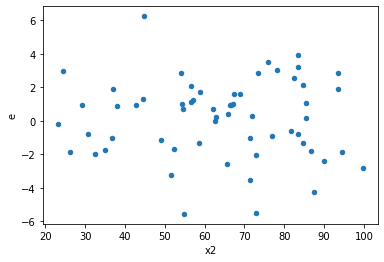

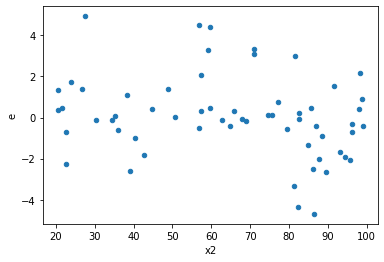

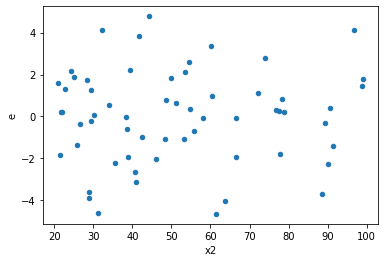

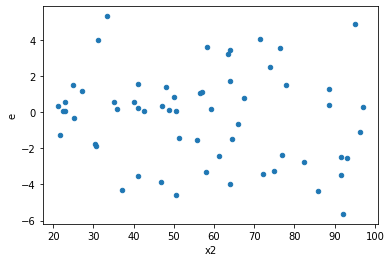

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,21.0,21.0,98.96851638174991,126.21762532349385,4.712786494369043,6.010363110642564,1.2753310844494863,0.5823233014491525,0.7088383492754238,0.2911616507245762,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,64.91232662760385,107.16519387443475,3.0910631727430404,5.1031044702111785,1.6509220889467078,0.2587620956261376,0.8706189521869312,0.1293810478130688,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,96.53634790930076,111.90156489267449,4.5969689480619405,5.328645947270213,1.1591650949734487,0.7381759766494991,0.6309120116752505,0.36908798832474954,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,83.90409398821494,101.93990845925937,3.9954330470578543,4.854281355202827,1.214957502235561,0.6595650896766987,0.6702174551616507,0.32978254483834935,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,76.32229003959996,137.79023203295804,3.6343947637904743,6.561439620617049,1.8053733969652288,0.18411800581307114,0.9079409970934644,0.09205900290653557,Reject005=1 : Homoscedasticity
10.0,21.0,21.0,78.87894459152173,81.92690963704453,3.7561402186438917,3.901281411287835,1.0386410475102936,0.9315937635817364,0.5342031182091318,0.4657968817908682,Reject005=1 : Homoscedasticity
11.0,21.0,21.0,69.99243292263259,77.89089233412588,3.3329729963158377,3.7090901111488512,1.112847333371366,0.8087540005074514,0.5956229997462743,0.4043770002537257,Reject005=1 : Homoscedasticity
13.0,21.0,21.0,80.40101290229143,103.88477599366131,3.8286196620138773,4.946894094936253,1.292082925869465,0.5623002816193785,0.7188498591903107,0.28115014080968925,Reject005=1 : Homoscedasticity
14.0,21.0,21.0,70.62912791142499,122.94800479553643,3.363291805305952,5.854666895025544,1.7407549608955077,0.2122960196024355,0.8938519901987823,0.10614800980121775,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,125.33886531493161,114.8747147052883,5.9685173959491244,5.470224509775633,0.9165131215816367,0.843547341790997,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,102.02222315063216,72.7426901285622,4.858201102411055,3.4639376251696286,0.7130082827264039,0.44481034922105744,Reject005=1 : Homoscedasticity
2.0,21.0,21.0,98.96851638174991,126.21762532349385,4.712786494369043,6.010363110642564,1.2753310844494863,0.5823233014491525,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,64.91232662760385,107.16519387443475,3.0910631727430404,5.1031044702111785,1.6509220889467078,0.2587620956261376,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,80.53322026019354,45.13686519602514,3.8349152504854067,2.149374533144054,0.5604751064243195,0.19291021499438174,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,151.3477649594359,72.83754352068634,7.207036426639805,3.468454453366016,0.4812594592342226,0.10137834996628442,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,96.53634790930076,111.90156489267449,4.5969689480619405,5.328645947270213,1.1591650949734487,0.7381759766494991,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,83.90409398821494,101.93990845925937,3.9954330470578543,4.854281355202827,1.214957502235561,0.6595650896766987,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,76.32229003959996,137.79023203295804,3.6343947637904743,6.561439620617049,1.8053733969652288,0.18411800581307114,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      926
Reject005=0 : Heteroscedasticity     74
Name: Result_test, dtype: int64